## TODO:
    1- Add more comments to processes and functions
    2- Modify code for more people
    3- Add conclusions to plots

#### Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
import re

#### Read file

In [11]:
list_data = glob.glob("../data/*")
list_data

['../data/JohnCornyn.csv',
 '../data/BernieSanders.csv',
 '../data/KamalaHarrys.csv',
 '../data/MarshaBlackburn.csv',
 '../data/ewarren.csv',
 '../data/GOPLeader.csv',
 '../data/SpeakerPelosi.csv',
 '../data/SteveScalise.csv',
 '../data/tedcruz.csv',
 '../data/senrobportman.csv',
 '../data/CoryBooker.csv',
 '../data/RandPaul.csv',
 '../data/KamalaHarris.csv',
 '../data/MittRomney.csv',
 '../data/marcorubio.csv',
 '../data/JoeBiden.csv',
 '../data/JeffMerkley.csv',
 '../data/DickDurbin.csv',
 '../data/AOC.csv',
 '../data/JeanneShaheen.csv',
 '../data/AlexPadilla4CA.csv',
 '../data/BillHagertyTN.csv',
 '../data/DanCrenshawTX.csv']

In [29]:
re.search('data/(.*).csv', list_data[0]).group(1)

'JohnCornyn'

In [38]:
df = pd.DataFrame(columns=["id", "user", "username", "created_at", "text", "lang", "label"])
for path in list_data:
    df_user = pd.read_csv(path, sep="|")
    user = re.search('data/(.*).csv', path).group(1)
    df_user['username'] = user
    df = pd.concat([df, df_user], ignore_index=True)

#df = pd.read_csv(list_data[0], sep="|")
#Only in english
df = df[df['lang']=='en']

In [39]:
df.head()

,id,user,username,created_at,text,lang,label
0,1499551665296486414,13218102,JohnCornyn,Fri Mar 04 01:05:51 +0000 2022,Today the Senate passed my bill to rename the ...,en,Republican Party
1,1499551568873631752,13218102,JohnCornyn,Fri Mar 04 01:05:28 +0000 2022,"Big thanks to @usmayors, @leagueofcities, @NAC...",en,Republican Party
2,1499475400396791808,13218102,JohnCornyn,Thu Mar 03 20:02:49 +0000 2022,Looking good https://t.co/gjeoRyj1R8,en,Republican Party
3,1499455748505583618,13218102,JohnCornyn,Thu Mar 03 18:44:43 +0000 2022,Rebranding doesn’t change bad policy. https://...,en,Republican Party
4,1499454474653507588,13218102,JohnCornyn,Thu Mar 03 18:39:39 +0000 2022,1 big thing: Putin's CEO crisis https://t.co/n...,en,Republican Party


In [40]:
df.username.unique()

array(['JohnCornyn', 'BernieSanders', 'KamalaHarrys', 'MarshaBlackburn',
       'ewarren', 'GOPLeader', 'SpeakerPelosi', 'SteveScalise', 'tedcruz',
       'senrobportman', 'CoryBooker', 'RandPaul', 'KamalaHarris',
       'MittRomney', 'marcorubio', 'JoeBiden', 'JeffMerkley',
       'DickDurbin', 'AOC', 'JeanneShaheen', 'AlexPadilla4CA',
       'BillHagertyTN', 'DanCrenshawTX'], dtype=object)

#### First of all, lets transform twitter date to python datetime

In [41]:
def twitter_date_to_datetime(twitter_date):
    return datetime.strptime(twitter_date,'%a %b %d %H:%M:%S +0000 %Y')

In [42]:
df['created_at'] = df['created_at'].apply(twitter_date_to_datetime)

In [43]:
df.head()

,id,user,username,created_at,text,lang,label
0,1499551665296486414,13218102,JohnCornyn,2022-03-04 01:05:51,Today the Senate passed my bill to rename the ...,en,Republican Party
1,1499551568873631752,13218102,JohnCornyn,2022-03-04 01:05:28,"Big thanks to @usmayors, @leagueofcities, @NAC...",en,Republican Party
2,1499475400396791808,13218102,JohnCornyn,2022-03-03 20:02:49,Looking good https://t.co/gjeoRyj1R8,en,Republican Party
3,1499455748505583618,13218102,JohnCornyn,2022-03-03 18:44:43,Rebranding doesn’t change bad policy. https://...,en,Republican Party
4,1499454474653507588,13218102,JohnCornyn,2022-03-03 18:39:39,1 big thing: Putin's CEO crisis https://t.co/n...,en,Republican Party


#### Now let's check out the length of tweets

In [44]:
df['length'] = df['text'].apply(lambda x: len(x))

In [45]:
df.head()

,id,user,username,created_at,text,lang,label,length
0,1499551665296486414,13218102,JohnCornyn,2022-03-04 01:05:51,Today the Senate passed my bill to rename the ...,en,Republican Party,140
1,1499551568873631752,13218102,JohnCornyn,2022-03-04 01:05:28,"Big thanks to @usmayors, @leagueofcities, @NAC...",en,Republican Party,144
2,1499475400396791808,13218102,JohnCornyn,2022-03-03 20:02:49,Looking good https://t.co/gjeoRyj1R8,en,Republican Party,36
3,1499455748505583618,13218102,JohnCornyn,2022-03-03 18:44:43,Rebranding doesn’t change bad policy. https://...,en,Republican Party,61
4,1499454474653507588,13218102,JohnCornyn,2022-03-03 18:39:39,1 big thing: Putin's CEO crisis https://t.co/n...,en,Republican Party,64


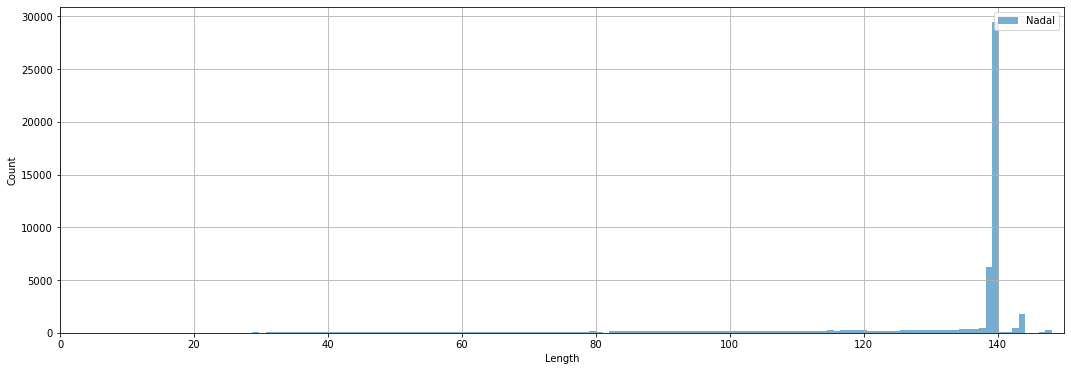

In [46]:
plt.rcParams['figure.figsize'] = (18, 6)
bins = 150
plt.hist(df['length'], alpha = 0.6, bins=bins, label='Nadal')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

#### Characters in tweets

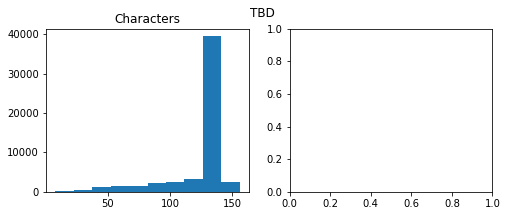

In [47]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,3))
tweet_len=df['text'].str.len()
ax1.hist(tweet_len)
ax1.set_title('Characters')
fig.suptitle('TBD')
plt.show()

#### Temporal distribution of tweets by month

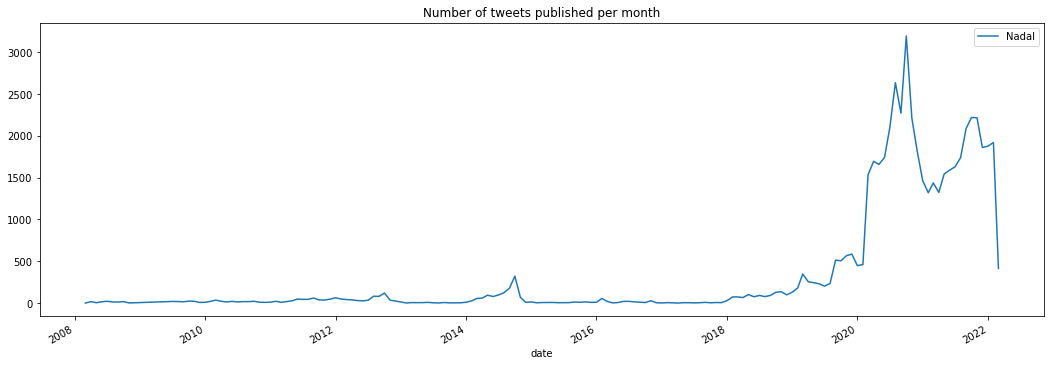

In [48]:
fig, ax = plt.subplots(figsize=(18, 6))

df_temp = df.copy()
df_temp['date'] = pd.to_datetime(df_temp['created_at'].dt.strftime('%m/%Y'))
df_temp = df_temp.groupby(df_temp['date']).size()
df_temp.plot(label='Nadal', ax=ax)

ax.set_title('Number of tweets published per month')
ax.legend();

#### Number of words in tweets

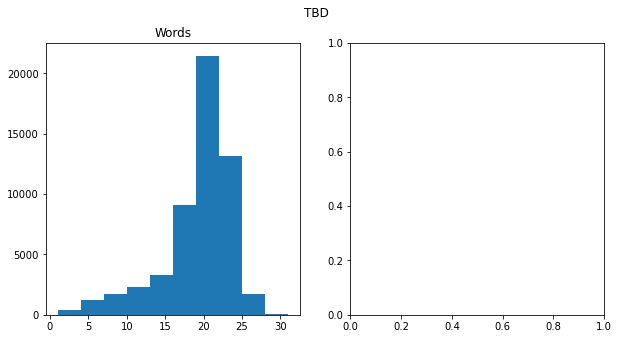

In [49]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len)
ax1.set_title('Words')
fig.suptitle('TBD')
plt.show()

#### Average word lenght in tweets

/home/dsc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


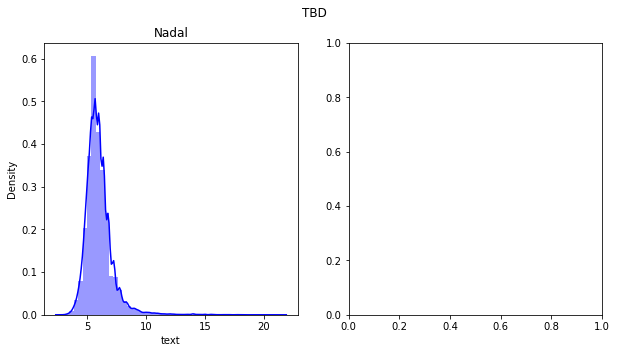

In [50]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Nadal')
fig.suptitle('TBD');

In [51]:
#pending add as argument the ID or name of the person
def create_list_of_words():
    list_of_words=[]
    
    for x in df['text'].str.split():
        for i in x:
            list_of_words.append(i)
    return list_of_words

In [52]:
create_list_of_words()[:20]

['Today',
 'the',
 'Senate',
 'passed',
 'my',
 'bill',
 'to',
 'rename',
 'the',
 'VA',
 'Clinic',
 'in',
 'San',
 'Angelo,',
 'Texas.',
 'The',
 'new',
 'name',
 'honors',
 'Colonel']

#### Punctuation and strange characters in tweets

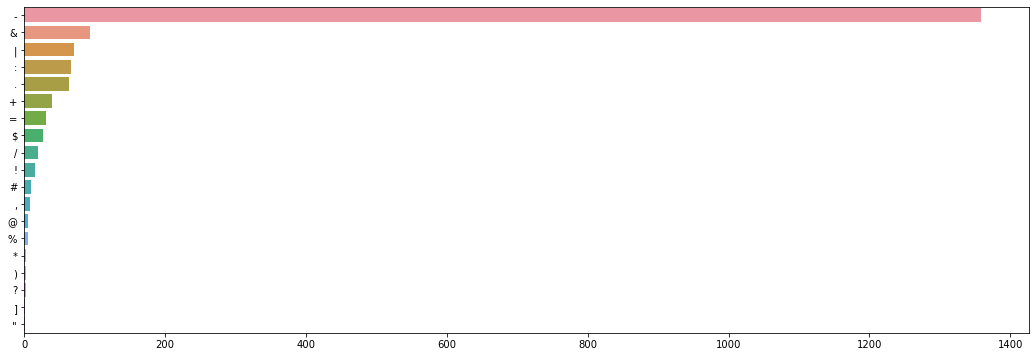

In [53]:
import string

plt.figure(figsize=(18,6))
list_of_words=create_list_of_words()

punctuation = string.punctuation
special_characters = []

for word in list_of_words:
    if word in punctuation:
        special_characters.append(word)
        
dict_count_characters = {i:special_characters.count(i) for i in special_characters}
dict_count_characters_ordered = sorted(dict_count_characters.items(), key=lambda x: x[1], reverse=True)

characters = [i[0] for i in dict_count_characters_ordered]
count = [i[1] for i in dict_count_characters_ordered]

sns.barplot(x=count,y=characters);

#### Most common words in tweets

In [ ]:
list_of_words=create_list_of_words()
top_used_words = {i:list_of_words.count(i) for i in list_of_words}
top_used_words_ordered = sorted(top_used_words.items(), key=lambda x: x[1], reverse=True)
top_used_words_ordered[:5]

In [ ]:
words = [i[0] for i in top_used_words_ordered[:20]]
count = [i[1] for i in top_used_words_ordered[:20]]
sns.barplot(x=count,y=words);

#### Most common words in tweets which are not stop words

[nltk_data] Downloading package stopwords to /home/dsc/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<AxesSubplot:>

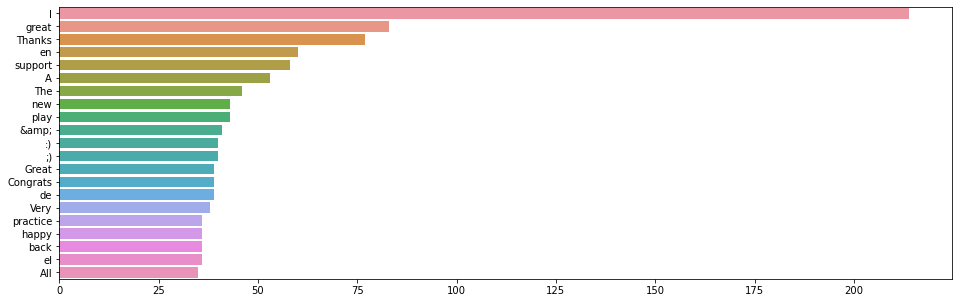

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

words = []
count = []
for word, number in top_used_words_ordered:
    if len(words) > 20:
        break
    elif (word not in stop):
        words.append(word)
        count.append(number)

plt.figure(figsize=(16,5))
sns.barplot(x=count,y=words)

#### Most common pairs of words in tweets

In [20]:
def create_list_of_bigrams():
    list_of_bigrams=[]
    
    for x in df['text'].str.split():
        for i in range(len(x)-1):
            list_of_bigrams.append(tuple(x[i:i+2]))
    return list_of_bigrams

In [21]:
list_of_bigrams = create_list_of_bigrams()

In [22]:
top_used_bigrams = {i:list_of_bigrams.count(i) for i in list_of_bigrams}
top_used_bigrams_ordered = sorted(top_used_bigrams.items(), key=lambda x: x[1], reverse=True)
top_used_bigrams_ordered[:5]

[(('for', 'the'), 88),
 (('of', 'the'), 69),
 (('in', 'the'), 57),
 (('for', 'your'), 56),
 (('to', 'the'), 54)]

In [23]:
#transform the bigrams from tuple to string
for i in range(len(top_used_bigrams_ordered)):
    top_used_bigrams_ordered[i] = (" ".join(top_used_bigrams_ordered[i][0]), top_used_bigrams_ordered[i][1])

In [24]:
top_used_bigrams_ordered[:20]

[('for the', 88),
 ('of the', 69),
 ('in the', 57),
 ('for your', 56),
 ('to the', 54),
 ('at the', 54),
 ('a great', 35),
 ('to be', 33),
 ('with my', 33),
 ('with the', 32),
 ('Thanks for', 29),
 ('my support', 28),
 ('Thank you', 28),
 ('Thanks to', 26),
 ('support to', 26),
 ('to my', 25),
 ('All my', 25),
 ('to all', 24),
 ('to play', 24),
 ('I have', 22)]

<AxesSubplot:>

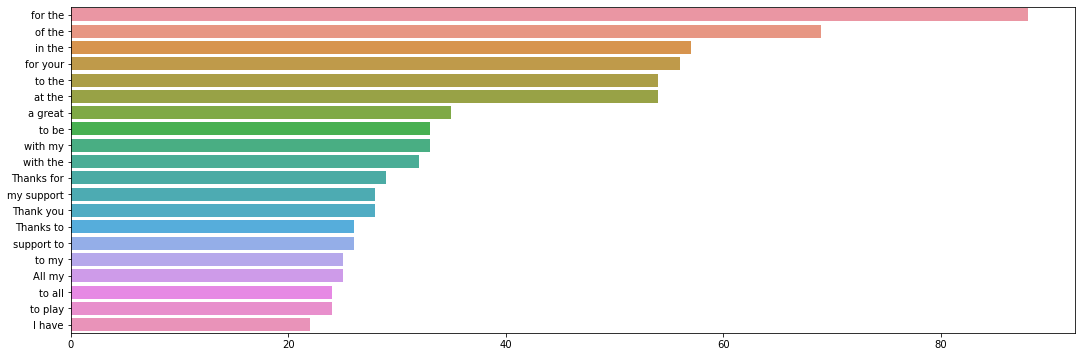

In [25]:
x,y=map(list,zip(*top_used_bigrams_ordered[:20]))
sns.barplot(x=y,y=x)

#### I suspect that there are gonna be URLs

In [28]:
df.query('text.str.contains("http")', engine='python')

,created_at,id,text,user,lang,length
0,2022-02-08 15:06:11,1.491066e+18,Hey all @FanJoltLive is launching today w/give...,344634424.0,en,144
1,2022-02-03 16:16:15,1.489272e+18,Roger. You book the practice court? Or is it m...,344634424.0,en,131
2,2022-02-02 18:46:22,1.488947e+18,Thanks to the fans and to those that have supp...,344634424.0,en,140
4,2022-01-16 04:34:24,1.482572e+18,"Chris, all the best to you and get well! And I...",344634424.0,en,105
5,2022-01-15 05:45:43,1.482227e+18,"This year, @Kia_Worldwide will turn ocean wast...",344634424.0,en,139
...,...,...,...,...,...,...
2565,2011-08-06 18:24:23,9.990869e+16,Second training day at Montreal!! Today with m...,344634424.0,en,90
2567,2011-08-05 23:08:19,9.961776e+16,We are going to have dinner at a Japanese rest...,344634424.0,en,126
2569,2011-08-05 20:10:04,9.957290e+16,Great training with Alex Bogomolov Jr! Today f...,344634424.0,en,105
2571,2011-08-05 04:32:47,9.933703e+16,Again at court! Sunny day to play tennis at Mo...,344634424.0,en,74


# WE HAVE TO CLEAN EVERYTHING, THIS IS FULL OF SHIT